<a href="https://colab.research.google.com/github/Dwiriskaanggraini/posttest2DatMin/blob/main/C1_088_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import modul
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [4]:
df = pd.read_csv("dataset_market_basket.csv")
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 1 item dataset
df.sum()

whole milk              5.0
 pastry                 1.0
 salty snack            1.0
 sausage                4.0
 semi-finished bread    1.0
 yogurt                 1.0
 soda                   2.0
 pickled vegetables     3.0
 canned beer            1.0
 misc. beverages        1.0
 hygiene articles       0.0
 rolls/buns             4.0
 frankfurter            2.0
 whipped/sour cream     1.0
 curd                   1.0
beef                    1.0
white bread             1.0
butter                  2.0
 frozen vegetables      1.0
 other vegetables       1.0
tropical fruit          1.0
 sugar                  0.0
 butter milk            1.0
 specialty chocolate    2.0
 frozen meals           1.0
 dental care            0.0
 root vegetables        1.0
 detergent              1.0
 dish cleaner           1.0
 cling film/bags        1.0
dtype: float64

In [6]:
# Untuk melihat item apa saja yang terdapat pada data tersebut
df.columns

Index(['whole milk', ' pastry', ' salty snack', ' sausage',
       ' semi-finished bread', ' yogurt', ' soda', ' pickled vegetables',
       ' canned beer', ' misc. beverages', ' hygiene articles', ' rolls/buns',
       ' frankfurter', ' whipped/sour cream', ' curd', 'beef', 'white bread',
       'butter', ' frozen vegetables', ' other vegetables', 'tropical fruit',
       ' sugar', ' butter milk', ' specialty chocolate', ' frozen meals',
       ' dental care', ' root vegetables', ' detergent', ' dish cleaner',
       ' cling film/bags'],
      dtype='object')

In [7]:
# 2 item set
from itertools import permutations
# extract item yang unik
rules = list(permutations(df.columns, 2))
rules

[('whole milk', ' pastry'),
 ('whole milk', ' salty snack'),
 ('whole milk', ' sausage'),
 ('whole milk', ' semi-finished bread'),
 ('whole milk', ' yogurt'),
 ('whole milk', ' soda'),
 ('whole milk', ' pickled vegetables'),
 ('whole milk', ' canned beer'),
 ('whole milk', ' misc. beverages'),
 ('whole milk', ' hygiene articles'),
 ('whole milk', ' rolls/buns'),
 ('whole milk', ' frankfurter'),
 ('whole milk', ' whipped/sour cream'),
 ('whole milk', ' curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', ' frozen vegetables'),
 ('whole milk', ' other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', ' sugar'),
 ('whole milk', ' butter milk'),
 ('whole milk', ' specialty chocolate'),
 ('whole milk', ' frozen meals'),
 ('whole milk', ' dental care'),
 ('whole milk', ' root vegetables'),
 ('whole milk', ' detergent'),
 ('whole milk', ' dish cleaner'),
 ('whole milk', ' cling film/bags'),
 (' pastry', 'whole milk'),
 (' p

In [8]:
# Memfilter data yang ada isinya saja yang akan dihitung
rule_new = []
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_new.append(rule)
rule_new

[('whole milk', ' pastry'),
 ('whole milk', ' salty snack'),
 ('whole milk', ' sausage'),
 ('whole milk', ' semi-finished bread'),
 ('whole milk', ' yogurt'),
 ('whole milk', ' pickled vegetables'),
 ('whole milk', ' rolls/buns'),
 ('whole milk', 'butter'),
 (' pastry', 'whole milk'),
 (' pastry', ' salty snack'),
 (' salty snack', 'whole milk'),
 (' salty snack', ' pastry'),
 (' sausage', 'whole milk'),
 (' sausage', ' semi-finished bread'),
 (' sausage', ' yogurt'),
 (' sausage', ' pickled vegetables'),
 (' sausage', ' rolls/buns'),
 (' semi-finished bread', 'whole milk'),
 (' semi-finished bread', ' sausage'),
 (' semi-finished bread', ' yogurt'),
 (' yogurt', 'whole milk'),
 (' yogurt', ' sausage'),
 (' yogurt', ' semi-finished bread'),
 (' soda', ' pickled vegetables'),
 (' soda', ' frankfurter'),
 (' soda', ' whipped/sour cream'),
 (' pickled vegetables', 'whole milk'),
 (' pickled vegetables', ' sausage'),
 (' pickled vegetables', ' soda'),
 (' canned beer', ' misc. beverages'),

In [9]:
hitung = {} #Ganti dictionary

# Buat dictionary baru dengan nama variabel yang berbeda
for rule in rule_new:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data 

hitung

{"('whole milk', ' pastry')": 1,
 "('whole milk', ' salty snack')": 1,
 "('whole milk', ' sausage')": 2,
 "('whole milk', ' semi-finished bread')": 1,
 "('whole milk', ' yogurt')": 1,
 "('whole milk', ' pickled vegetables')": 1,
 "('whole milk', ' rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "(' pastry', 'whole milk')": 1,
 "(' pastry', ' salty snack')": 1,
 "(' salty snack', 'whole milk')": 1,
 "(' salty snack', ' pastry')": 1,
 "(' sausage', 'whole milk')": 2,
 "(' sausage', ' semi-finished bread')": 1,
 "(' sausage', ' yogurt')": 1,
 "(' sausage', ' pickled vegetables')": 1,
 "(' sausage', ' rolls/buns')": 2,
 "(' semi-finished bread', 'whole milk')": 1,
 "(' semi-finished bread', ' sausage')": 1,
 "(' semi-finished bread', ' yogurt')": 1,
 "(' yogurt', 'whole milk')": 1,
 "(' yogurt', ' sausage')": 1,
 "(' yogurt', ' semi-finished bread')": 1,
 "(' soda', ' pickled vegetables')": 1,
 "(' soda', ' frankfurter')": 1,
 "(' soda', ' whipped/sour cream')": 1,
 "(' pickled vegetabl

In [10]:
# List support
support = [i/len(df)*100 for i in hitung.values()]
# print(support)

print("---")
for item,ab in hitung.items():
  # Untuk menghitung jumlah persentase dari nilai support
  print(f"{item} support = {ab/len(df)*100}%") 

---
('whole milk', ' pastry') support = 5.263157894736842%
('whole milk', ' salty snack') support = 5.263157894736842%
('whole milk', ' sausage') support = 10.526315789473683%
('whole milk', ' semi-finished bread') support = 5.263157894736842%
('whole milk', ' yogurt') support = 5.263157894736842%
('whole milk', ' pickled vegetables') support = 5.263157894736842%
('whole milk', ' rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
(' pastry', 'whole milk') support = 5.263157894736842%
(' pastry', ' salty snack') support = 5.263157894736842%
(' salty snack', 'whole milk') support = 5.263157894736842%
(' salty snack', ' pastry') support = 5.263157894736842%
(' sausage', 'whole milk') support = 10.526315789473683%
(' sausage', ' semi-finished bread') support = 5.263157894736842%
(' sausage', ' yogurt') support = 5.263157894736842%
(' sausage', ' pickled vegetables') support = 5.263157894736842%
(' sausage', ' rolls/buns') support = 10.5263157894

In [11]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #ubah list dari string
  # Untuk menghitung jumlah persentase dari nilai confidence
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%") 

---
whole milk-> pastry  Confidence = 20.0%
whole milk-> salty snack  Confidence = 20.0%
whole milk-> sausage  Confidence = 40.0%
whole milk-> semi-finished bread  Confidence = 20.0%
whole milk-> yogurt  Confidence = 20.0%
whole milk-> pickled vegetables  Confidence = 20.0%
whole milk-> rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
 pastry->whole milk  Confidence = 100.0%
 pastry-> salty snack  Confidence = 100.0%
 salty snack->whole milk  Confidence = 100.0%
 salty snack-> pastry  Confidence = 100.0%
 sausage->whole milk  Confidence = 50.0%
 sausage-> semi-finished bread  Confidence = 25.0%
 sausage-> yogurt  Confidence = 25.0%
 sausage-> pickled vegetables  Confidence = 25.0%
 sausage-> rolls/buns  Confidence = 50.0%
 semi-finished bread->whole milk  Confidence = 100.0%
 semi-finished bread-> sausage  Confidence = 100.0%
 semi-finished bread-> yogurt  Confidence = 100.0%
 yogurt->whole milk  Confidence = 100.0%
 yogurt-> sausage  Confidence = 100.0%
 yogurt-> 

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

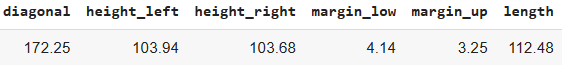
<!-- 1412 -->

###Data Understanding

In [12]:
df = pd.read_csv("deteksi_uang_palsu.csv")
dst = pd.DataFrame(df)
dst

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


<Axes: xlabel='is_genuine', ylabel='count'>

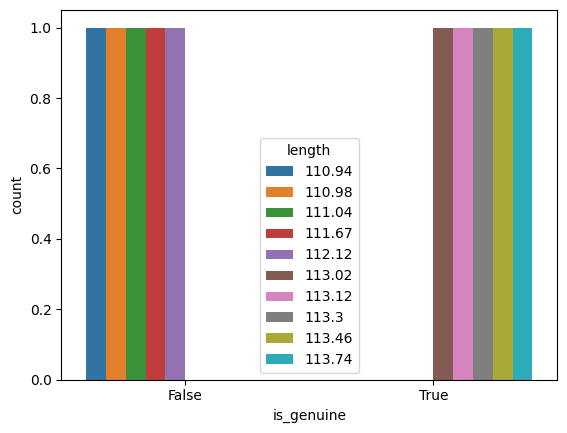

In [13]:
# Visualisasi
sns.countplot(data=dst,x="is_genuine",hue="length")

###Data Preparation

In [14]:
# Tampilkan data
dst

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [15]:
#Melihat data apa saja yang bernilai kosong
dst.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [16]:
# Melihat panjang data 
len(dst)

10

In [17]:
# Untuk menampilkan data yang bernilai NULL dan bernilai tidak NULL dengan membagi jumlah data yang dikali dengan 100
dst.isna().sum() / len(dst) * 100

is_genuine      0.0
diagonal        0.0
height_left     0.0
height_right    0.0
margin_low      0.0
margin_up       0.0
length          0.0
dtype: float64

###Target

In [18]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [19]:
# Membuat tabel jarak
# Membuat dataframe dari data baru
dstb = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

In [20]:
distances = []
for i in range(len(dst)):
    row = dst.iloc[i]
    distance = np.sqrt((row['diagonal'] - dstb['diagonal']) ** 2 +
                       (row['height_left'] - dstb['height_left']) ** 2 +
                       (row['height_right'] - dstb['height_right']) ** 2 +
                       (row['margin_low'] - dstb['margin_low']) ** 2 +
                       (row['margin_up'] - dstb['margin_up']) ** 2 +
                       (row['length'] - dstb['length']) ** 2)
    distances.append(distance)

In [21]:
# Memisahkan data dan target
X = dst.iloc[:, :-1]
y = dst.iloc[:, -1]

In [22]:
# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
dst['jarak'] = distances

In [23]:
# Menyimpan hasil ke file CSV
dst.to_csv('deteksi_uang_palsu_jarak.csv', index=False)

In [24]:
# Menampilkan hasil file CSV dari penambahan kolom jarak
dst_jarak = pd.read_csv('deteksi_uang_palsu_jarak.csv')
dst_jarak

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [25]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [26]:
# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

In [27]:
# Mengambil K jarak terdekat
K = int(np.sqrt(len(dst)))
indices = np.argsort(distances)[:K]

In [28]:
# Mengurutkan data berdasarkan K jarak terdekat
dst_sorted = dst.iloc[indices].reset_index(drop=True)

In [29]:
# Menyimpan hasil ke file CSV
dst_sorted.to_csv('deteksi_uang_palsu_sorted.csv', index=False)

In [30]:
# Hasil file csv dari penambahan kolom jarak
dst_sorted = pd.read_csv('deteksi_uang_palsu_sorted.csv')
dst_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
1,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206
2,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021


In [31]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [32]:
# Menghitung jumlah masing-masing label
label_counts = dst["is_genuine"].value_counts()

In [33]:
# Menampilkan label terbanyak
print("Label terbanyak adalah", label_counts.idxmax())

Label terbanyak adalah True


# (3) Analisis

> Nama : Riska Dwi Anggraini

> Nim : 2109116088




Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

###Business Understanding
Dataset yang digunakan merupakan data-data penjualan dari Supermarket kami. Data tersebut akan kami gunakan untuk memprediksi penjualan di masa yang akan datang dengan menganalisis beberapa item yang sering/biasa dibeli oleh costumer kami melalui struk penjualan, sehingga kami dapat memaksimalkan dan meningkatkan tingkat produktivitas barang penjualan di Supermarket kami. 

###Data Understanding

In [34]:
#untuk koneksikan suatu data dari dalam file csv
df = pd.read_csv("market.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


####Data Preparation

In [35]:
# Dari dataset diatas buatlah variabel yang berisi
# df1 isinya dataset dengan label Member
df1 = df[df["Customer type"] == "Member"]

# df2 isinya dataset dengan label bukan Member
df2 = df[df["Customer type"] != "Member"]

# df3 isinya dataset dengan jumlah pembelian lebih dari 5 item
df3 = df[df["Quantity"] > 5]

# df4 isinya dataset dengan labeb Cash
df4 = df[df["Payment"] == "Cash"]

####Dataset Info

In [36]:
# Isi dari df1 menampilkan data dengan atribut Customer type yang berisi Member ja
# Berikut ini adalah hasil yang ditampilkan dari data df1
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [37]:
# Isi dari df1 menampilkan data dengan atribut Customer type yang berisi bukan Member ja
# Berikut ini adalah hasil yang ditampilkan dari data df2
df2

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [38]:
# Isi dari df1 menampilkan data dengan atribut Quantity yang berisi lebih dari 5 item
# Berikut ini adalah hasil yang ditampilkan dari data df3
df3

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [39]:
# Isi dari df1 menampilkan data dengan atribut Payment yang berisi Cash
# Berikut ini adalah hasil yang ditampilkan dari data df4
df4

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,4.761905,5.1020,6.8
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
26,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,2/8/2019,15:31,Cash,33.52,4.761905,1.6760,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


###Explore Data

####Visualisasi Comparison

<Axes: xlabel='Customer type', ylabel='count'>

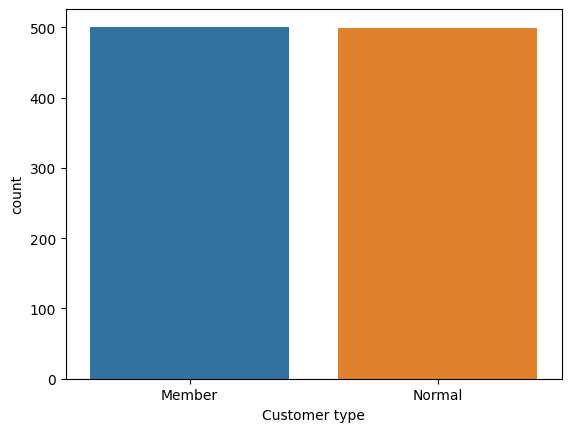

In [40]:
# Menampilkan jumlah masing-masing customer type (Member dan Normal)
sns.countplot(data=df, x="Customer type")

<Axes: xlabel='Product line', ylabel='count'>

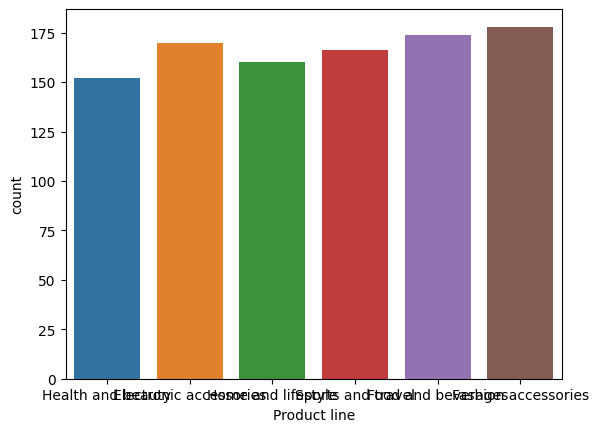

In [41]:
# Menampilkan Product line berdasarkan kategorinya
sns.countplot(data=df, x="Product line")

<Axes: xlabel='Gender', ylabel='count'>

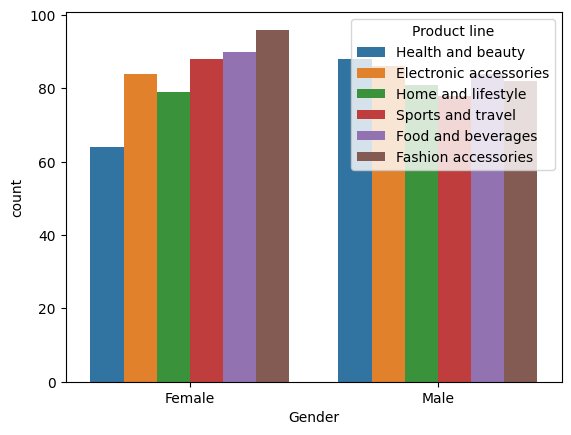

In [42]:
# Menampilkan berapa banyak Product line berdasarkan gender
sns.countplot(data=df,x="Gender", hue="Product line")

####Visualisasi Distribution

<Axes: xlabel='Total', ylabel='Count'>

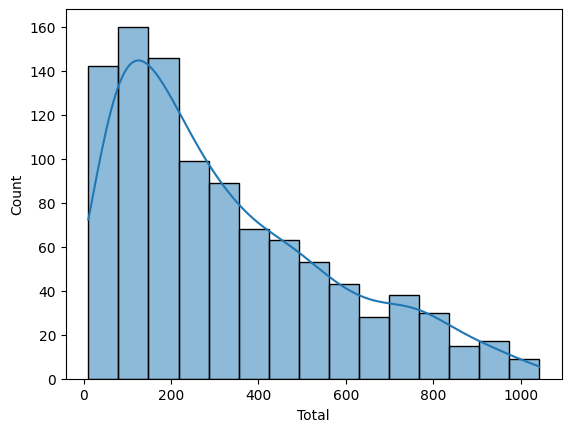

In [43]:
# Buatlah histogram untuk Total pembayaran 
sns.histplot(data=df,x="Total", kde=True)

<Axes: xlabel='Total'>

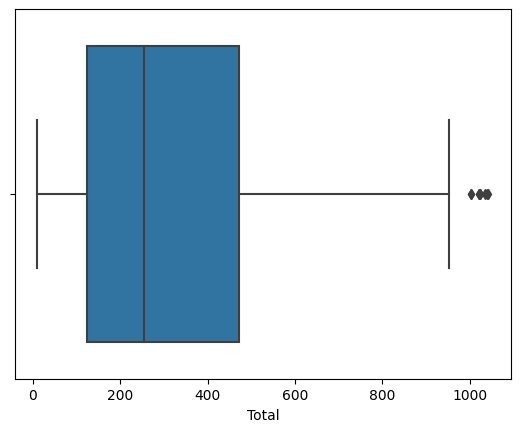

In [44]:
# Buatlah boxplot untuk umur Total pembayaran 
sns.boxplot(data=df,x="Total")

####Visualisasi Relationship

<Axes: xlabel='Quantity', ylabel='Total'>

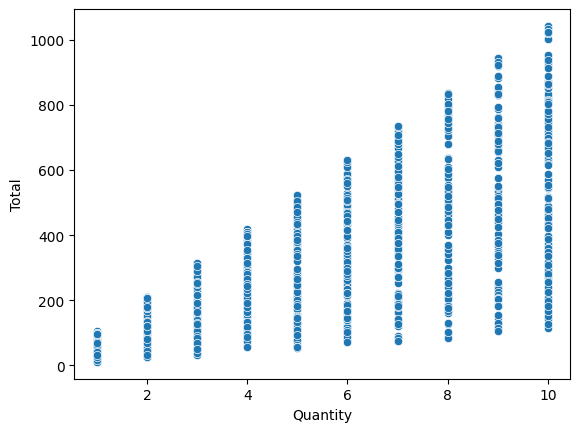

In [45]:
# Buatlah scatterplot untuk Jumlah barang dan Total penjualan
sns.scatterplot(data=df,x="Quantity",y="Total")

####Visualisasi Composition

In [46]:
# Buatlah pieplot untuk Quantity penjualan 
px.pie(df,names="Quantity")

In [47]:
# Buatlah pieplot untuk Payment (jenis pembayaran) 
px.pie(df,names="Payment")